In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read in product information
products = pd.read_csv('C:/DS/Springboard/1st_capstone_project/products/products.csv')


In [26]:
#check order information
df_pr = pd.read_csv('C:/DS/Springboard/1st_capstone_project/order_products__prior/order_products__prior.csv')
df_tr = pd.read_csv('C:/DS/Springboard/1st_capstone_project/order_products__train/order_products__train.csv')

# Part 1: Data Wrangling 

In [5]:
ord_df = pd.read_csv('C:/DS/Springboard/1st_capstone_project/orders.csv')

In [5]:
ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [6]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [28]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
#check for missing value
print(df_pr.isna().sum())
print(df_tr.isna().sum())
print(ord_df.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


In [9]:
# check relationship between prior and train dataset
ord_df[ord_df['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [10]:
#check nan
ord_df["days_since_prior_order"].astype(float).isna().sum()

206209

In [11]:
#check unique values in each column
uni_count = [ord_df[column].nunique() for column in ord_df]
uni_count

[3421083, 206209, 3, 100, 7, 24, 31]

In [12]:
#check difference between prior, test and train
#user id count
ord_df.groupby('eval_set')['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

C:\Users\cfuth\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


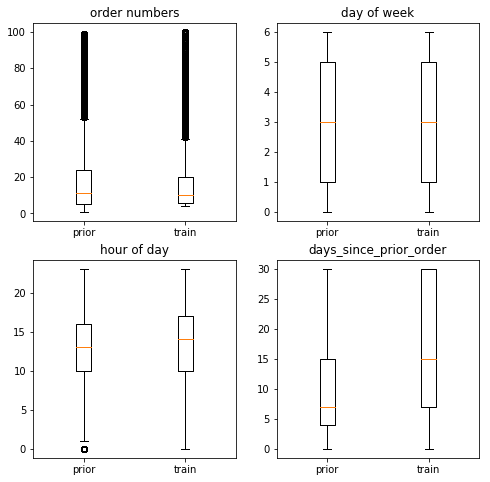

In [13]:
#box plot to show whether there are outliners
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(221)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_number'],ord_df[ord_df['eval_set']=='train']['order_number']])
a.set_xticks([1,2])
a.set_xticklabels(['prior','train'])
a.set_title('order numbers')

b = fig.add_subplot(222)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_dow'],ord_df[ord_df['eval_set']=='train']['order_dow']])
b.set_xticks([1,2])
b.set_xticklabels(['prior','train'])
b.set_title('day of week')

c = fig.add_subplot(223)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_hour_of_day'],ord_df[ord_df['eval_set']=='train']['order_hour_of_day']])
c.set_xticks([1,2])
c.set_xticklabels(['prior','train'])
c.set_title('hour of day')

d = fig.add_subplot(224)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['days_since_prior_order'].dropna(),ord_df[ord_df['eval_set']=='train']['days_since_prior_order']])
d.set_xticks([1,2])
d.set_xticklabels(['prior','train'])
d.set_title('days_since_prior_order')
plt.show()

# Findings: 
1. order.csv includes information on orders such as order id in database, order number for this user, user id, which set it belongs to (prior, test or training) and when it happens(day of week, order time of day, days since prior order)
2. orders_products datasets store information on each order, including order id, product id, add to cart order and whether it is a reorder
3. The only missing value in the datset is "days since prior order" for some orders in prior set since they are first time orders.
4. There are no outliers found.
5. Users in prior set are divided to training and test sets.
6. For users in the training set, one order is hold out in the training set and the rest orders are in prior.

# Part 2: Exploratory Data Analysis

C:\Users\cfuth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\cfuth\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


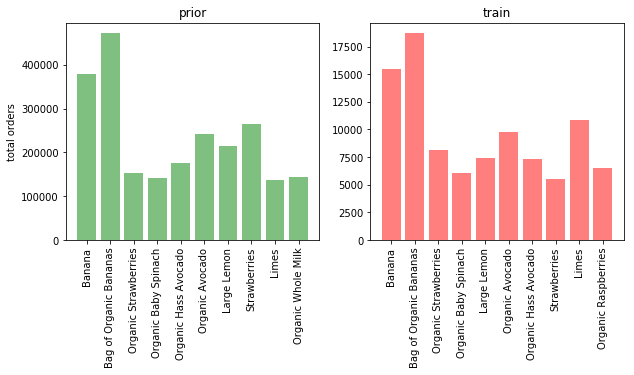

In [6]:
#check what products are ordered the most 
product_count_pr = df_pr.groupby('product_id')['order_id'].count().reset_index(name="count").sort_values('count',ascending=False)
product_count_pr10 = product_count_pr.iloc[0:10,:]
product_pr10 = [products[products['product_id']==prod]['product_name'].iloc[0] for prod in product_count_pr10['product_id']]
product_count_pr10['product_name'] = product_pr10

product_count_tr = df_tr.groupby('product_id')['order_id'].count().reset_index(name="count").sort_values('count',ascending=False)
product_count_tr10 = product_count_tr.iloc[0:10,:]
product_tr10 = [products[products['product_id']==prod]['product_name'].iloc[0] for prod in product_count_tr10['product_id']]
product_count_tr10['product_name'] = product_tr10

fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)

plt.bar(product_count_pr10['product_name'],product_count_pr10['count'],facecolor='g',alpha=0.5)
a.set_title('prior')
labels = product_count_pr10['product_name']
a.set_xticklabels(labels, rotation=90)
a.set_ylabel('total orders')

b = fig.add_subplot(122)
plt.bar(product_count_tr10['product_name'],product_count_tr10['count'],facecolor='r',alpha=0.5)
b.set_title('train')
labels = product_count_tr10['product_name']
b.set_xticklabels(labels,rotation=90)


plt.show()

C:\Users\cfuth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\cfuth\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


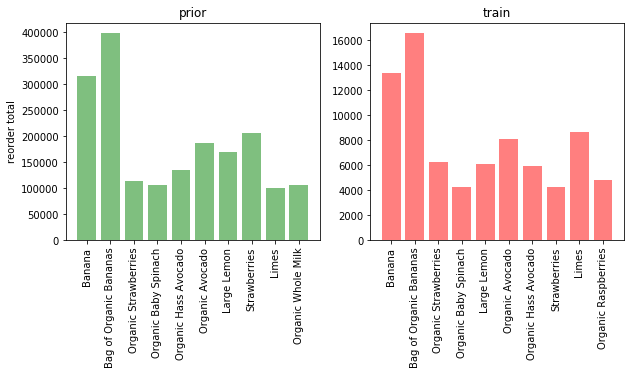

In [15]:
#get most reordered items
product_reo_pr = df_pr.groupby('product_id')['reordered'].sum().reset_index(name='reorder_total').sort_values('reorder_total',ascending=False)
product_reo_pr10 = product_reo_pr.iloc[0:10,:]
reo_pr10 = [products[products['product_id']==prod]['product_name'].iloc[0] for prod in product_count_pr10['product_id']]
product_reo_pr10['product_name'] = reo_pr10

product_reo_tr = df_tr.groupby('product_id')['reordered'].sum().reset_index(name='reorder_total').sort_values('reorder_total',ascending=False)
product_reo_tr10 = product_reo_tr.iloc[0:10,:]
reo_tr10 = [products[products['product_id']==prod]['product_name'].iloc[0] for prod in product_count_tr10['product_id']]
product_reo_tr10['product_name'] = reo_tr10

fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)

plt.bar(product_reo_pr10['product_name'],product_reo_pr10['reorder_total'],facecolor='g',alpha=0.5)
a.set_title('prior')
labels = product_reo_pr10['product_name']
a.set_xticklabels(labels, rotation=90)
a.set_ylabel('reorder total')

b = fig.add_subplot(122)
plt.bar(product_reo_tr10['product_name'],product_reo_tr10['reorder_total'],facecolor='r',alpha=0.5)
b.set_title('train')
labels = product_reo_tr10['product_name']
b.set_xticklabels(labels,rotation=90)


plt.show()


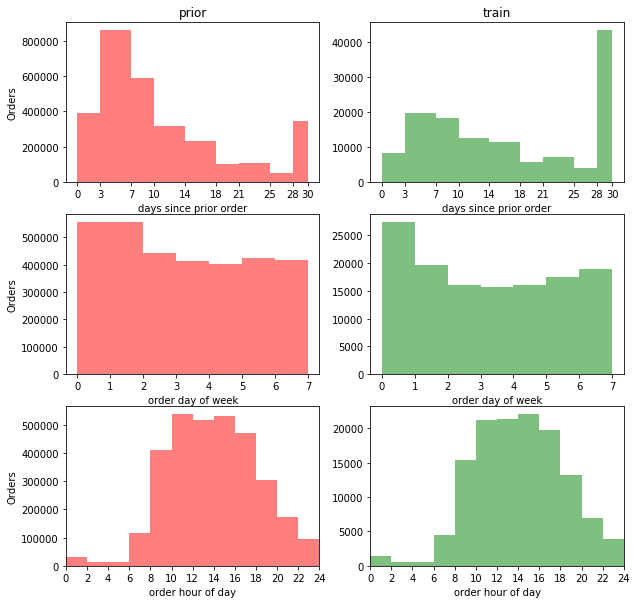

In [16]:
#check days to prior order distribution and what time to order 

bins = [0,3,7,10,14,18,21,25,28,30]
xlabels = [str(b) for b in bins]
fig = plt.figure(figsize=(10,10))

b = fig.add_subplot(321)
plt.hist(ord_df[ord_df['eval_set']=='prior']['days_since_prior_order'].dropna(),bins=bins,facecolor='r',alpha=0.5)
b.set_title('prior')
b.set_xticks(bins)
b.set_xticklabels(xlabels)
b.set_xlabel('days since prior order')
b.set_ylabel('Orders')

a = fig.add_subplot(322)
plt.hist(ord_df[ord_df['eval_set']=='train']['days_since_prior_order'],bins=bins,facecolor='g',alpha=0.5)
a.set_xticks(bins)
a.set_xticklabels(xlabels)
a.set_title('train')
a.set_xlabel('days since prior order')

bins = np.arange(0,8,1)

d = fig.add_subplot(323)
plt.hist(ord_df[ord_df['eval_set']=='prior']['order_dow'],bins=bins,facecolor='r',alpha=0.5)
d.set_xlabel('order day of week')
d.set_ylabel('Orders')

c = fig.add_subplot(324)
plt.hist(ord_df[ord_df['eval_set']=='train']['order_dow'],bins=bins,facecolor='g',alpha=0.5)
c.set_xlabel('order day of week')

bins = np.arange(0,25,2)
xlabels = [str(b) for b in bins]

f = fig.add_subplot(325)
plt.hist(ord_df[ord_df['eval_set']=='prior']['order_hour_of_day'],bins=bins,facecolor='r',alpha=0.5)
f.set_xlim(0,24)
f.set_xticks(bins)
f.set_xticklabels(xlabels)
f.set_xlabel('order hour of day')
f.set_ylabel('Orders')

e = fig.add_subplot(326)
plt.hist(ord_df[ord_df['eval_set']=='train']['order_hour_of_day'],bins=bins,facecolor='g',alpha=0.5)
e.set_xlabel('order hour of day')
e.set_xlim(0,24)
e.set_xticks(bins)
e.set_xticklabels(xlabels)


plt.show()


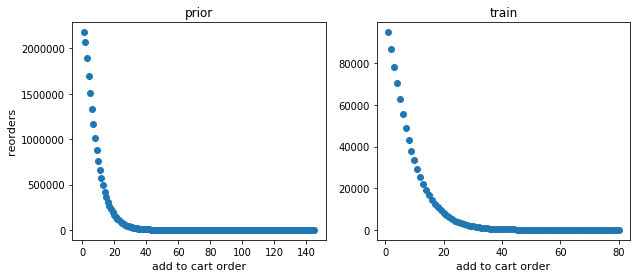

In [8]:
#check relationship between reorder times and add to cart order
df_pr_gp = df_pr.groupby('add_to_cart_order')['reordered'].sum()
df_pr_gp = df_pr_gp.reset_index()
df_pr_gp.columns = ['add_to_cart_order','reorder_sum']

df_tr_gp = df_tr.groupby('add_to_cart_order')['reordered'].sum()
df_tr_gp = df_tr_gp.reset_index()
df_tr_gp.columns = ['add_to_cart_order','reorder_sum']
#df_pr_gp.head()
fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)
plt.scatter(df_pr_gp['add_to_cart_order'],df_pr_gp['reorder_sum'])
a.set_xlabel('add to cart order',fontsize=11)
a.set_ylabel('reorders',fontsize=11)
a.set_title('prior')

b = fig.add_subplot(122)
plt.scatter(df_tr_gp['add_to_cart_order'],df_tr_gp['reorder_sum'])
b.set_xlabel('add to cart order',fontsize=11)
b.set_title('train')

plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19126536 entries, 0 to 19126535
Data columns (total 10 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 1.6+ GB


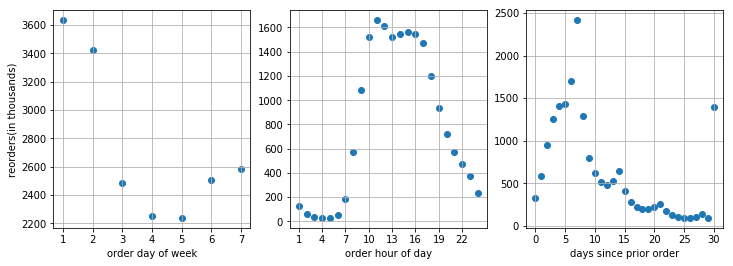

In [9]:
# how long they reorder since prior order, at what day of week, and order hour of day
pr_re = df_pr[df_pr['reordered'] == 1]
tr_re = df_tr[df_tr['reordered'] == 1]
pr_merge = pd.merge(pr_re,ord_df,how='left',on='order_id')
pr_merge.info()
pr_me_dow = pr_merge.groupby('order_dow')['reordered'].sum()/1000  #reorder sum by day of week
pr_me_hod = pr_merge.groupby('order_hour_of_day')['reordered'].sum()/1000  #reorder sum by hour of day
pr_me_spo = pr_merge.groupby('days_since_prior_order')['reordered'].sum()/1000 #reorder sum by days since prior order
del(pr_merge)
pr_me_dow = pr_me_dow.reset_index()
pr_me_hod = pr_me_hod.reset_index()
pr_me_spo = pr_me_spo.reset_index()
pr_me_dow.columns = ['order_dow','reorder']
pr_me_hod.columns = ['order_hour_of_day','reorder']
pr_me_spo.columns = ['days_since_prior_order','reorder']

fig = plt.figure(figsize=(12,4))
a = fig.add_subplot(131)
xlab = [str(i) for i in range(1,8,1)]
plt.scatter(pr_me_dow['order_dow'],pr_me_dow['reorder'])
a.set_xlabel('order day of week')
a.set_ylabel('reorders(in thousands)')
a.set_xticks(np.arange(0,7,1))
a.set_xticklabels(xlab)
plt.grid(True)

b = fig.add_subplot(132)
plt.scatter(pr_me_hod['order_hour_of_day'],pr_me_hod['reorder'])
b.set_xlabel('order hour of day')
plt.grid(True)
xlab = [str(i) for i in np.arange(1,25,3)]
b.set_xticks(np.arange(0,24,3))
b.set_xticklabels(xlab)
#b.set_ylabel('reorders')

c = fig.add_subplot(133)
plt.scatter(pr_me_spo['days_since_prior_order'],pr_me_spo['reorder'])
c.set_xlabel('days since prior order')
plt.grid(True)
xlab = [str(i) for i in np.arange(0,31,5)]
c.set_xticks(np.arange(0,31,5))
c.set_xticklabels(xlab)
#c.set_ylabel('reorders')

plt.show()

# What aisles and deparments have most reorders

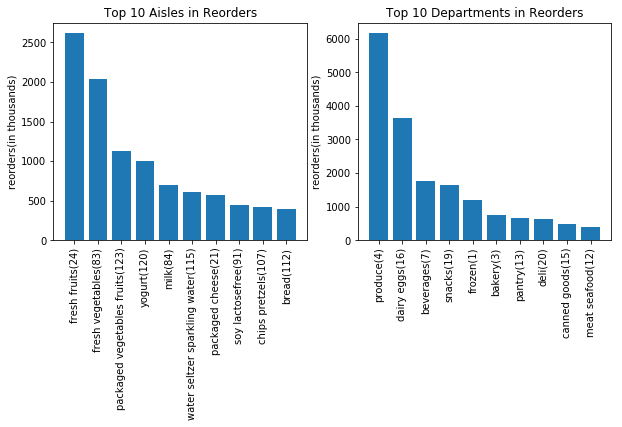

In [10]:
pr_pro = pr_re.groupby('product_id')['reordered'].sum()/1000
pr_pro = pr_pro.reset_index()
pr_pro.columns = ['product_id','reorder_sum']
pr_pro_me = pd.merge(pr_pro,products,how='left',on='product_id')
pr_pro_ais = pr_pro_me.groupby('aisle_id')['reorder_sum'].sum()
pr_pro_dep = pr_pro_me.groupby('department_id')['reorder_sum'].sum()
pr_pro_ais = pr_pro_ais.reset_index()
pr_pro_dep = pr_pro_dep.reset_index()
pr_pro_ais.columns = ['aisle_id','reorder_sum']
pr_pro_dep.columns = ['department_id','reorder_sum']
department = pd.read_csv('C:/DS/Springboard/1st_capstone_project/departments/departments.csv')
aisle = pd.read_csv('C:/DS/Springboard/1st_capstone_project/aisles/aisles.csv')
pr_ais = pd.merge(pr_pro_ais,aisle,how='left',on='aisle_id')
pr_dep = pd.merge(pr_pro_dep,department,how='left',on='department_id')
pr_ais = pr_ais.sort_values('reorder_sum',ascending=False)
pr_dep = pr_dep.sort_values('reorder_sum',ascending=False)
pr_ais10 = pr_ais.iloc[0:10,:]
pr_dep10 = pr_dep.iloc[0:10,:]

x = np.arange(0,10,1)
fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)
plt.bar(x,pr_ais10['reorder_sum'])
a.set_title('Top 10 Aisles in Reorders')
a.set_ylabel('reorders(in thousands)')
labels = [pr_ais10['aisle'].iloc[i] + '(' + str(pr_ais10['aisle_id'].iloc[i]) + ')' for i in range(10)]
a.set_xticks(x)
a.set_xticklabels(labels, rotation=90)


b = fig.add_subplot(122)
plt.bar(x,pr_dep10['reorder_sum'])
b.set_title('Top 10 Departments in Reorders')
b.set_ylabel('reorders(in thousands)')
labels = [pr_dep10['department'].iloc[i] + '(' + str(pr_dep10['department_id'].iloc[i]) + ')' for i in range(10)]
b.set_xticks(x)
b.set_xticklabels(labels, rotation=90)

plt.show()

In [20]:
pr_ais10

,aisle_id,reorder_sum,aisle
23,24,2615.469,fresh fruits
82,83,2032.172,fresh vegetables
122,123,1127.177,packaged vegetables fruits
119,120,997.018,yogurt
83,84,696.264,milk
114,115,613.977,water seltzer sparkling water
20,21,573.383,packaged cheese
90,91,442.023,soy lactosefree
106,107,425.387,chips pretzels
111,112,391.937,bread


# product reorder frequency

In [27]:
#dataframe for prior set with all order related info
pr_ord = pd.merge(df_pr,ord_df,how='left',on='order_id')
pr_ord.head()

MemoryError: 

In [98]:
#order frequency of particular product for each user
#first round use groupby.mean(), didn't see much difference among departments
#second round: use most frequent reorder time interval   
fre = pr_ord.groupby(['product_id','user_id'])['days_since_prior_order'].apply(lambda x: x.value_counts().index[0])
fre_new = fre.reset_index()
fre_new.columns = ['product_id','user_id','frequency']
fre_new.head()

MemoryError: 

In [39]:
fre_new.describe()

,product_id,user_id,mean_frequency
count,1.330795e+07,1.330795e+07,1.243988e+07
mean,2.551351e+04,1.029987e+05,1.270081e+01
std,1.422429e+04,5.943677e+04,8.893559e+00
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.329200e+04,5.157900e+04,6.000000e+00
50%,2.564000e+04,1.027130e+05,1.000000e+01
75%,3.815700e+04,1.544500e+05,1.816667e+01
max,4.968800e+04,2.062090e+05,3.000000e+01


In [73]:
#plot the variation in order frequency among users for selected items
count_sel = product_count_pr.iloc[[0,100,500,1000,2000,5000,10000,20000],:]
count_sel = count_sel.reset_index()
count_sel.columns = ['index','product_id','count']
fre_sel = pd.merge(fre_new,count_sel,on='product_id',how='inner')
fre_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94612 entries, 0 to 94611
Data columns (total 5 columns):
product_id        94612 non-null int64
user_id           94612 non-null int64
mean_frequency    90096 non-null float64
index             94612 non-null int64
count             94612 non-null int64
dtypes: float64(1), int64(4)
memory usage: 4.3 MB


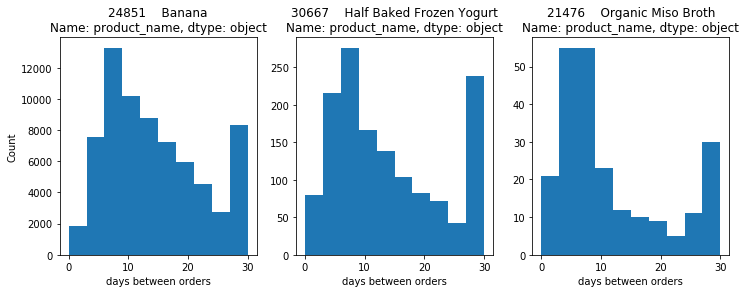

In [77]:
#plot histogram of banana, organic avacado and milk
fre_sel = fre_sel.dropna()
fig = plt.figure(figsize=(12,4))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    if i==0:
        plt.hist(fre_sel[fre_sel['product_id']==count_sel['product_id'][0]]['mean_frequency'])
        plt.title(products[products['product_id']==count_sel['product_id'][0]]['product_name'])
        plt.ylabel('Count')
    if i==1:
        plt.hist(fre_sel[fre_sel['product_id']==count_sel['product_id'][4]]['mean_frequency'])
        plt.title(products[products['product_id']==count_sel['product_id'][4]]['product_name'])
    if i==2:
        plt.hist(fre_sel[fre_sel['product_id']==count_sel['product_id'][6]]['mean_frequency'])
        plt.title(products[products['product_id']==count_sel['product_id'][6]]['product_name'])
    plt.xlabel('days between orders')
plt.show()

In [23]:
#merge frequency into the matrix
#pr_ord_fre = pd.merge(pr_ord,fre_new,on=['product_id','user_id'],how='left')
#merge product information into the matrix
pr_ord_all = pd.merge(pr_ord,products,on='product_id',how='left')
pr_ord_all.head()

MemoryError: 

In [90]:
pr_dep = pr_dep.reset_index()
pr_dep.columns = ['index','department_id','reorder_sum','department']

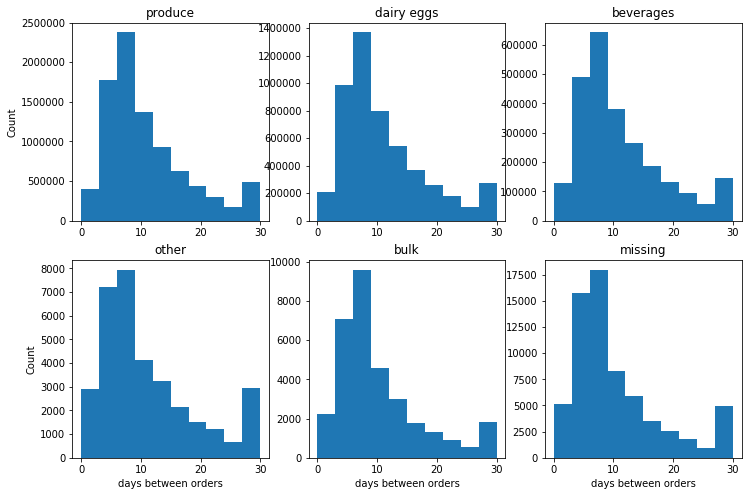

In [94]:
#plot frequency variance over department
fig = plt.figure(figsize=(12,8))
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    if i <3:
        plt.hist(pr_ord_all[pr_ord_all['department_id']==pr_dep['department_id'][i]]['mean_frequency'])
        plt.title(pr_dep['department'][i])
    else:
        plt.hist(pr_ord_all[pr_ord_all['department_id']==pr_dep['department_id'][len(pr_dep)+2-i]]['mean_frequency'])
        plt.title(pr_dep['department'][len(pr_dep)+2-i])
        plt.xlabel('days between orders')
    if i%3 == 0:
        plt.ylabel('Count')
    
plt.show()

# Part 3: Feature selection
First round include 9 features:
- product_id
- add_to_cart_order
- user_id
- order_number
- order_dow
- order_hour_of_day
- days_since_prior_order
- aisle_id
- department_id


# Part 4: Model

In [22]:
column_list = pr_ord_all.columns
print(column_list)
pr_ord_all = pr_ord_all.dropna() #remove missing values
X_prior = pr_ord_all[['product_id', 'add_to_cart_order','user_id','order_number', 'order_dow', 'order_hour_of_day','days_since_prior_order','aisle_id','department_id']]
y_prior = pr_ord_all['reordered']

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id'],
      dtype='object')


MemoryError: 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [20]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pr_sc = scaler.fit_transform(X_prior)

In [21]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_pr_sc,y_prior)
y_pre = logreg.predict(X_pr_sc)
print(accuracy_score(y_prior,y_pre))
print(f1_score(y_prior,y_pre))

ValueError: Found input variables with inconsistent numbers of samples: [30356421, 32434489]

# Part 5: Result Analysis

In [34]:
new_pr_day = pr_re_day.groupby(['product_id','days_since_prior_order']).size()
new_pr_day = new_pr_day.reset_index()
new_pr_day.columns = ['product_id','days_since_prior_day','reorder_total']
new_pr_day.head()

,product_id,days_since_prior_day,reorder_total
0,1,0.0,71
1,1,1.0,74
2,1,2.0,65
3,1,3.0,68
4,1,4.0,51


In [60]:
reorder_sum = new_pr_day.groupby('product_id').reorder_total.sum()
reorder_sum = reorder_sum.reset_index()
reorder_sum.columns = ['product_id','product_reorder_sum']
print(reorder_sum.head())
new_pr_sum = pd.merge(new_pr_day,reorder_sum,how='left',on = 'product_id')
new_pr_sum['percentage'] = 100*new_pr_sum['reorder_total']/new_pr_sum['product_reorder_sum'] #reorder frequency across 31 days
print(new_pr_sum.head())
new_pr_sum = new_pr_sum.sort_values('product_reorder_sum',ascending=False)
print(new_pr_sum.head())

   product_id  product_reorder_sum
0           1                 1136
1           2                   12
2           3                  203
3           4                  147
4           5                    9
   product_id  days_since_prior_day  reorder_total  product_reorder_sum  \
0           1                   0.0             71                 1136   
1           1                   1.0             74                 1136   
2           1                   2.0             65                 1136   
3           1                   3.0             68                 1136   
4           1                   4.0             51                 1136   

   percentage  
0    6.250000  
1    6.514085  
2    5.721831  
3    5.985915  
4    4.489437  
        product_id  days_since_prior_day  reorder_total  product_reorder_sum  \
354000       24852                   0.0           5290               398609   
354023       24852                  23.0           2636               398609   
354

In [53]:
# define short-term,mid-term and long-term reorder products based on when peak reorder occurs
# short-term reorder,days_since_previous_order <= 7 days
# mid-term reorder, 7 < days_since_previous_order <= 14
# long-term reorder, days_since_previous_order > 14
# find top 10 products in each category
nproduct = new_pr_sum.product_id.nunique()
product_id = new_pr_sum.product_id.unique()
pro_short = []
pro_middle = []
pro_long = []
print(nproduct)
for i in range(nproduct):
    per_max = max(new_pr_sum[new_pr_sum['product_id']==product_id[i]]['percentage'])
    max_day = new_pr_sum[new_pr_sum['percentage']==per_max]['days_since_prior_day']
    #print(max_day.iloc[0])
    if max_day.iloc[0] <= 7:
        pro_short.append(product_id[i])
    elif max_day.iloc[0] <= 14:
        pro_middle.append(product_id[i]) 
    else:
        pro_long.append(product_id[i])
df_short = pd.DataFrame(pro_short,columns=['product_id'])
df_middle = pd.DataFrame(pro_middle,columns=['product_id'])
df_long = pd.DataFrame(pro_long,columns=['product_id'])
df_short.head()

        product_id  days_since_prior_day  reorder_total  product_reorder_sum  \
354000       24852                   0.0           5290               398609   
354011       24852                  11.0          10522               398609   
354019       24852                  19.0           4010               398609   
354021       24852                  21.0           5677               398609   
354017       24852                  17.0           4650               398609   

        percentage  
354000    0.013271  
354011    0.026397  
354019    0.010060  
354021    0.014242  
354017    0.011666  
45305


,product_id
0,24852
1,13176
2,21137
3,21903
4,47209


   product_id            product_name  aisle_id  department_id
0       24852                  Banana        24              4
1       13176  Bag of Organic Bananas        24              4
2       21137    Organic Strawberries        24              4
3       21903    Organic Baby Spinach       123              4
4       47209    Organic Hass Avocado        24              4


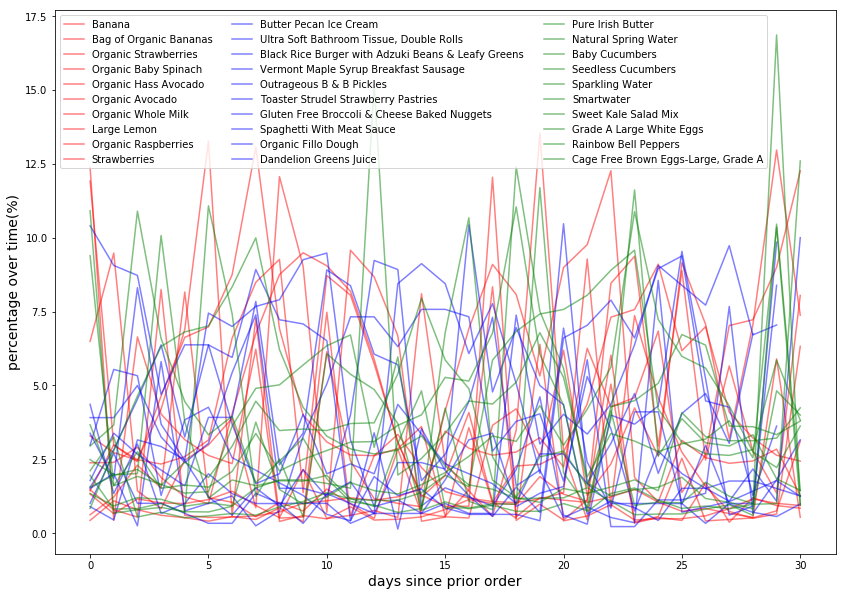

In [71]:
df_short10 = pd.merge(df_short,products,how='left',on='product_id').iloc[0:10]
df_middle10 = pd.merge(df_middle,products,how='left',on='product_id').iloc[0:10]
df_long10 = pd.merge(df_long,products,how='left',on='product_id').iloc[0:10]
print(df_short10.head())
fig = plt.figure(figsize=(14,10))
for i in range(30):
    if i < 10:
        x = np.arange(len(new_pr_sum[new_pr_sum['product_id']==df_short10.product_id.iloc[i]]))
        plt.plot(x,new_pr_sum[new_pr_sum['product_id']==df_short10.product_id.iloc[i]]['percentage'],color='r',alpha=0.5,label=df_short10.product_name.iloc[i])
    if i >= 10 and i < 20:
        x = np.arange(len(new_pr_sum[new_pr_sum['product_id']==df_middle10.product_id.iloc[i-10]]))
        plt.plot(x,new_pr_sum[new_pr_sum['product_id']==df_middle10.product_id.iloc[i-10]]['percentage'],color='b',alpha=0.5,label=df_middle10.product_name.iloc[i-10])
    if i >= 20:
        x = np.arange(len(new_pr_sum[new_pr_sum['product_id']==df_long10.product_id.iloc[i-20]]))
        plt.plot(x,new_pr_sum[new_pr_sum['product_id']==df_long10.product_id.iloc[i-20]]['percentage'],color='g',alpha=0.5,label=df_long10.product_name.iloc[i-20])
plt.legend(ncol=3)
plt.xlabel('days since prior order',fontsize=14)
plt.ylabel('percentage over time(%)',fontsize=14)
plt.show()